In [1]:
import pandas as pd

In [2]:
#Reading the population data set
df = pd.read_csv("data/Population_Mortality.csv")
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 164 entries, SUMLEV to RNETMIG2019
dtypes: float64(54), int64(108), object(2)
memory usage: 4.0+ MB


In [6]:
df.dtypes

SUMLEV           int64
REGION           int64
DIVISION         int64
STATE            int64
COUNTY           int64
                ...   
RNETMIG2015    float64
RNETMIG2016    float64
RNETMIG2017    float64
RNETMIG2018    float64
RNETMIG2019    float64
Length: 164, dtype: object

In [7]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       ...
       'RDOMESTICMIG2019', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017',
       'RNETMIG2018', 'RNETMIG2019'],
      dtype='object', length=164)

In [12]:
df.shape

(3193, 164)

In [12]:
len(df)

3193

In [17]:
# From this check, there do not seem to be any missing values in any of the columns represented 
#in this dataset

df.isnull().sum()

SUMLEV         0
REGION         0
DIVISION       0
STATE          0
COUNTY         0
              ..
RNETMIG2015    0
RNETMIG2016    0
RNETMIG2017    0
RNETMIG2018    0
RNETMIG2019    0
Length: 164, dtype: int64

## Data fields that will be necessary from this data set for the Maternal Mortality Study. The study will focus on years 2013-2015.

1.	SUMLEV: Geographic summary level
2.	REGION: Census Region code
3.	DIVISION: Census Division code
4.	STATE: State FIPS code
5.	COUNTY: County FIPS code
6.	STNAME: State name
7.	CTYNAME: County name
8.	POPESTIMATE2013: 7/1/2013 resident total population estimate
9.	POPESTIMATE2014: 7/1/2014 resident total population estimate
10.	POPESTIMATE2015: 7/1/2015 resident total population estimate
11.	BIRTHS2013: Births in period 7/1/2012 to 6/30/2013
12.	BIRTHS2014: Births in period 7/1/2013 to 6/30/2014
13.	BIRTHS2015: Births in period 7/1/2014 to 6/30/2015
14.	DEATHS2013: Deaths in period 7/1/2012 to 6/30/2013
15.	DEATHS2014: Deaths in period 7/1/2013 to 6/30/2014
16.	DEATHS2015: Deaths in period 7/1/2014 to 6/30/2015

## The key for SUMLEV is as follows:
040 = State and/or Statistical Equivalent
050 = County and /or Statistical Equivalent

## The key for REGION is as follows:
1 = Northeast
2 = Midwest
3 = South
4 = West

In [15]:
df.POPESTIMATE2014.value_counts(dropna=False)

9839      3
27814     3
9321      2
3969      2
13445     2
         ..
17768     1
10278     1
21866     1
778430    1
935935    1
Name: POPESTIMATE2014, Length: 3130, dtype: int64

In [3]:
newdf = df[(df.COUNTY == 0)]

In [18]:
newdf.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
68,40,4,9,2,0,Alaska,Alaska,710231,710249,713910,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
98,40,4,8,4,0,Arizona,Arizona,6392017,6392288,6407172,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
114,40,3,7,5,0,Arkansas,Arkansas,2915918,2916031,2921964,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429
190,40,4,9,6,0,California,California,37253956,37254519,37319502,...,-5.151429,1.276797,1.495016,1.649031,2.203551,1.984957,0.500044,-0.629909,-2.130954,-3.276681


In [4]:
newdf1 = newdf[["STNAME", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "BIRTHS2013", 
            "BIRTHS2014", "BIRTHS2015", "DEATHS2013", "DEATHS2014", "DEATHS2015" ]]

In [5]:
newdf1.head(10)

,STNAME,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2013,DEATHS2014,DEATHS2015
0,Alabama,4830081,4841799,4852347,57929,58903,59647,50851,49712,51876
68,Alaska,737068,736283,737498,11350,11443,11330,4039,4024,4350
98,Arizona,6632764,6730413,6829676,86093,86129,86764,50612,50236,52846
114,Arkansas,2959400,2967392,2978048,37978,38225,38796,30994,29967,31318
190,California,38260787,38596972,38918045,499629,498914,500380,247704,244055,253798
249,Colorado,5269035,5350101,5450623,64729,65702,66350,33589,33935,36253
314,Connecticut,3594841,3594524,3587122,36142,36162,36321,29756,29669,30375
323,Delaware,923576,932487,941252,10890,10981,11026,8085,8072,8543
327,District of Columbia,650581,662328,675400,9445,9334,9648,4813,4650,4883
329,Florida,19545621,19845911,20209042,212988,218333,221746,181609,181024,191076


In [6]:
newdf1.describe()

,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2013,DEATHS2014,DEATHS2015
count,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.195955e+06,6.241196e+06,6.286964e+06,77266.196078,77709.705882,78281.882353,51137.627451,50636.235294,52937.764706
std,7.029241e+06,7.100271e+06,7.172361e+06,91272.632948,91957.127428,92849.064043,51490.729049,50895.621720,53134.626136
min,5.821220e+05,5.825310e+05,5.856130e+05,5980.000000,6118.000000,5972.000000,4039.000000,4024.000000,4350.000000
25%,1.732560e+06,1.740300e+06,1.746554e+06,21811.000000,21498.000000,21556.500000,14790.000000,14516.500000,15366.000000
50%,4.404659e+06,4.414349e+06,4.425976e+06,56046.000000,55758.000000,55943.000000,38598.000000,38607.000000,39730.000000
75%,6.838650e+06,6.908626e+06,6.996666e+06,86667.000000,86758.000000,87768.000000,62076.000000,61221.000000,64073.500000
max,3.826079e+07,3.859697e+07,3.891804e+07,499629.000000,498914.000000,500380.000000,247704.000000,244055.000000,253798.000000


<AxesSubplot:xlabel='POPESTIMATE2013', ylabel='STNAME'>

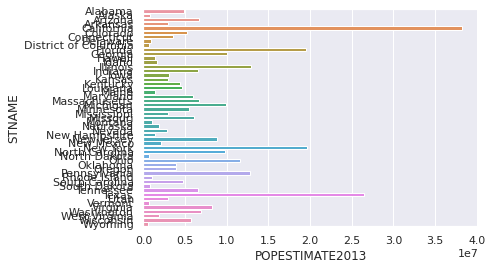

In [8]:
import seaborn as sns
sns.set()
sns.barplot(
x = "POPESTIMATE2013"
,
y = "STNAME",
data = newdf1
)

<AxesSubplot:xlabel='BIRTHS2013', ylabel='STNAME'>

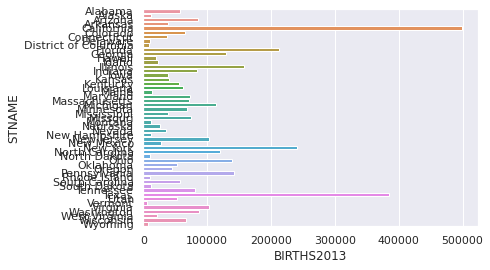

In [9]:
sns.set()
sns.barplot(
x = "BIRTHS2013"
,
y = "STNAME",
data = newdf1
)

<AxesSubplot:xlabel='DEATHS2013', ylabel='STNAME'>

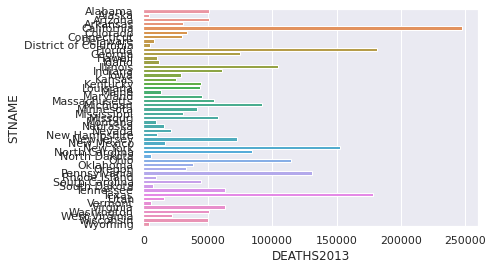

In [10]:
sns.set()
sns.barplot(
x = "DEATHS2013"
,
y = "STNAME",
data = newdf1
)

In [11]:
newdf1.dtypes

STNAME             object
POPESTIMATE2013     int64
POPESTIMATE2014     int64
POPESTIMATE2015     int64
BIRTHS2013          int64
BIRTHS2014          int64
BIRTHS2015          int64
DEATHS2013          int64
DEATHS2014          int64
DEATHS2015          int64
dtype: object

In [ ]:
import seaborn as sns
sns.set()
sns.barplot(
x = "total"
,
y = STNAME,
data = states
)

In [5]:
import pandas as pd
import censusdata
from tabulate import tabulate

In [7]:
df = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '36'), ('county', '*')]),
           ['B08301_001E', 'B08301_010E'])

In [8]:
print(tabulate(df, headers='keys', tablefmt='psql'))


+-------------------------------------------------------------------------+------------------+---------------+
|                                                                         |      B08301_001E |   B08301_010E |
|-------------------------------------------------------------------------+------------------+---------------|
| Schoharie County, New York: Summary level: 050, state:36> county:095    |  13742           |           200 |
| Fulton County, New York: Summary level: 050, state:36> county:035       |  23546           |           141 |
| Rensselaer County, New York: Summary level: 050, state:36> county:083   |  78398           |          1757 |
| Franklin County, New York: Summary level: 050, state:36> county:033     |  19534           |           136 |
| Queens County, New York: Summary level: 050, state:36> county:081       |      1.07675e+06 |        562857 |
| Washington County, New York: Summary level: 050, state:36> county:115   |  27979           |           240 |
|